### Linear Regression

#### Description:
Load a dataset and perform basic data exploration using pandas
Preprocess the data for linear regression.
Compute the cost and perform gradient descent in pure numpy in vectorized form.
Fit a linear regression model using a single feature.
Visualize your results using matplotlib.
Perform multivariate linear regression.
Perform polynomial regression.
Experiment with adaptive learning rates.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import copy
import os

#Aviod matplotlib warnings:
import warnings
import matplotlib.cbook 
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

np.random.seed(42) 

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
data_path=os.getcwd()
df = pd.read_csv('{}/data.csv'.format(data_path))
df.head(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,5.000000e+03,5.000000e+03,5000.0000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,4.630823e+09,5.394699e+05,3.3714,2.062150,2061.036800,1.615893e+04,1.432600,0.009400,0.243000,3.455000,7.595200,1753.151000,1966.660800,95.052800,98078.812600,47.559312,-122.215864,1976.84520,13451.164600
std,2.870890e+09,3.873115e+05,0.9104,0.773592,923.727509,4.600220e+04,0.510793,0.096506,0.774643,0.677692,1.166537,818.390844,28.286855,425.234932,54.126332,0.139521,0.141807,674.73601,26514.749009
min,1.000102e+06,7.500000e+04,0.0000,0.000000,380.000000,6.090000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.00000,660.000000
25%,2.154075e+09,3.179062e+05,3.0000,1.500000,1410.000000,5.400000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1949.000000,0.000000,98033.000000,47.463675,-122.329000,1490.00000,5391.500000
50%,4.022900e+09,4.490000e+05,3.0000,2.000000,1890.000000,7.875000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,1968.000000,0.000000,98070.000000,47.572850,-122.235000,1820.00000,7800.000000
75%,7.345078e+09,6.500000e+05,4.0000,2.500000,2500.000000,1.123400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,1990.000000,0.000000,98118.000000,47.679200,-122.129000,2340.00000,10469.250000
max,9.842300e+09,7.060000e+06,9.0000,6.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7680.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.00000,434728.000000


One variable `sqft_living` linear regression using pandas and transform into a numpy array.

In [6]:
X = df['sqft_living'].values
y = df['price'].values

## Preprocessing

In [7]:
def preprocess(X, y):
    """
    Perform mean normalization on the features and true labels.
    Speed up by normalizing the input data to ensure all values are within the same range. This is especially important for datasets with high standard deviations or differences in the ranges of the attributes
    Input:
    - X: Inputs (n features over m instances).
    - y: True labels.

    Returns a two vales:
    - X: The mean normalized inputs.
    - y: The mean normalized labels.
    """
    mean_normalization = lambda x: (x - np.mean(x, axis=0)) / (np.max(x, axis=0) - np.min(x, axis=0))
    X=mean_normalization(X)
    y=mean_normalization(y)
    print("Mean normalization has been applied per column")
    return X, y

In [8]:
X = df['sqft_living'].values
y = df['price'].values
X, y = preprocess(X, y)

Mean normalization has been applied per column


We will split the data into two datasets: 
1. The training dataset will contain 80% of the data and will always be used for model training.
2. The validation dataset will contain the remaining 20% of the data and will be used for model evaluation.

In [9]:
# training and validation split
def dataset_split(dataset,labels,split_ratio=0.8):
    np.random.seed(42)
    indices = np.random.permutation(dataset.shape[0])
    idx_train, idx_val = indices[:int(split_ratio*dataset.shape[0])], indices[int(split_ratio*dataset.shape[0]):]
    dataset_train, dataset_val = dataset[idx_train], dataset[idx_val]
    labels_train, labels_val = labels[idx_train], labels[idx_val]
    print('Dataset has been splitted in ratio of {}%'.format(split_ratio*100))
    return dataset_train, dataset_val, labels_train, labels_val

X_train,X_val,y_train,y_val=dataset_split(X,y,0.8)

Dataset has been splitted in ratio of 80.0%


## Data Visualization
two-dimensional scatter plot to visualize the data.

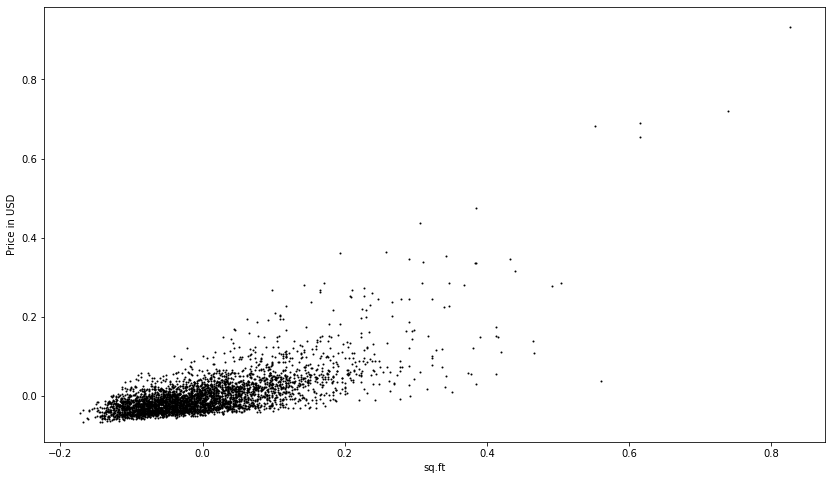

In [11]:
plt.plot(X_train, y_train, 'ro', ms=1, mec='k')
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.show()

In [12]:
def add_bias_1D(data):
    ones = np.ones((len(data),1))
    return np.c_[ones, data]

X_train = add_bias_1D(X_train)
X_val = add_bias_1D(X_val)
print('X_train shape: ' + str(X_train.shape) + ', X_val shape: ' + str(X_val.shape))

X_train shape: (4000, 2), X_val shape: (1000, 2)


## Single Variable Linear Regression
Simple linear regression is a linear regression model with a single explanatory varaible and a single target value. 

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

## Gradient Descent 

find the best possible linear line that explains all the points in our dataset. Start by guessing initial values for the linear regression parameters $\theta$ and updating the values using gradient descent. 

The objective of linear regression is to minimize the cost function $J$:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{n}(h_\theta(x^{(i)})-y^{(i)})^2
$$

where the hypothesis (model) $h_\theta(x)$ is given by a **linear** model:

$$
h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

$\theta_j$ are parameters of your model. and by changing those values accordingly you will be able to lower the cost function $J(\theta)$. One way to accopmlish this is to use gradient descent:

$$
\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
$$

In linear regresion, we know that with each step of gradient descent, the parameters $\theta_j$ get closer to the optimal values that will achieve the lowest cost $J(\theta)$.

In [17]:
def compute_cost(X, y, theta):
    """
    Computes the average squared difference between an obserbation's actual and
    predicted values for linear regression.  

    Input:
    - X: inputs  (n features over m instances).
    - y: true labels (1 value over m instances).
    - theta: the parameters (weights) of the model being learned.

    Returns a single value:
    - J: the cost associated with the current set of parameters (single number).
    """
    J = np.sum((((X.dot(theta)) - y) ** 2) / (2*len(y)))
    return J

In [18]:
theta = np.array([-1, 2])
J = compute_cost(X_train, y_train, theta)

In [19]:
def gradient_descent(X,y,theta,alpha=0.1,num_iters=4000, stop_parameter = -1):
    """
    Learn the parameters of the model using gradient descent using 
    the *training set*. Gradient descent is an optimization algorithm 
    used to minimize some (loss) function by iteratively moving in 
    the direction of steepest descent as defined by the negative of 
    the gradient. We use gradient descent to update the parameters
    (weights) of our model.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    
    theta = theta.copy() # avoid changing the original thetas
    m = len(y)
    J_history = np.zeros(num_iters)
    for it in range(num_iters):
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*alpha*(X.T.dot((prediction - y)))
        J_history[it]  = compute_cost(X, y, theta)
        if (stop_parameter != -1):
            if (it != 0 and (J_history[it - 1] - J_history[it] < stop_parameter)):
                break
    print('Gradient descent process is done. learning rate is: {}, num of iterations is: {}'.format(alpha,it+1))
    return theta, J_history

In [20]:
np.random.seed(42)
theta = np.random.random(size=2)
iterations = 40000
alpha = 0.1
theta, J_history = gradient_descent(X_train ,y_train, theta, alpha, iterations)

Gradient descent process is done. learning rate is: 0.1, num of iterations is: 40000


In [67]:
def pinv(X, y):
    """
    Calculate the optimal values of the parameters using the pseudoinverse
    approach

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).

    Returns two values:
    - theta: The optimal parameters of your model.
    """
    
    X_transpose=np.transpose(X)
    #X_transpose.shape
    X_T_X=np.matmul(X_transpose,X)
    X_T_X_inv=np.linalg.inv(X_T_X)
    pinv=np.matmul(X_T_X_inv,X_transpose)
    pinv_theta=np.matmul(pinv,y)
    print('Pinv process is done')
    return pinv_theta

In [68]:
theta_pinv = pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

Pinv process is done


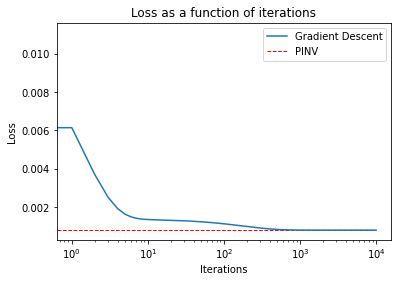

In [69]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.legend(["Gradient Descent", "PINV"], loc ="upper right")
plt.show()

In [70]:
def efficient_gradient_descent(X, y, theta, alpha, num_iters):
    """
    Instead of performing 40,000 iterations, stop when the improvement of the loss value is smaller than `1e-8`
    """
    return gradient_descent(X, y, theta, alpha, num_iters, 1e-8)

In [71]:
def find_best_alpha(X_train, y_train, X_val, y_val, iterations):
    """
    Iterate over provided values of alpha and train a model using the 
    *training* dataset. maintain a python dictionary with alpha as the 
    key and the loss on the *validation* set as the value.

    Input:
    - X_train, y_train, X_val, y_val: the training and validation data
    - iterations: maximum number of iterations

    Returns:
    - alpha_dict: A python dictionary - {key (alpha) : value (validation loss)}
    """
    
    alphas = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 2, 3]
    alpha_dict = {}
    alpha_dict_theta = {}
    for alpha in alphas:
        shape = X_train.shape[1]
        theta = np.random.random(shape)
        theta, J_history = efficient_gradient_descent(X_train, y_train, theta, alpha, iterations)
        loss = compute_cost(X_val, y_val, theta)
        alpha_dict[alpha] = loss
        alpha_dict_theta[alpha] = theta
    return alpha_dict, alpha_dict_theta

In [72]:
alpha_dict, alpha_dict_theta = find_best_alpha(X_train, y_train, X_val, y_val, 40000)

Gradient descent process is done. learning rate is: 1e-05, num of iterations is: 40000
Gradient descent process is done. learning rate is: 3e-05, num of iterations is: 40000
Gradient descent process is done. learning rate is: 0.0001, num of iterations is: 40000
Gradient descent process is done. learning rate is: 0.0003, num of iterations is: 16936
Gradient descent process is done. learning rate is: 0.001, num of iterations is: 5729
Gradient descent process is done. learning rate is: 0.003, num of iterations is: 17623
Gradient descent process is done. learning rate is: 0.01, num of iterations is: 563
Gradient descent process is done. learning rate is: 0.03, num of iterations is: 755
Gradient descent process is done. learning rate is: 0.1, num of iterations is: 2566
Gradient descent process is done. learning rate is: 0.3, num of iterations is: 812
Gradient descent process is done. learning rate is: 1, num of iterations is: 324
Gradient descent process is done. learning rate is: 2, num of

Obtain the best learning rate from the dictionary `alpha_dict`. This can be done in a single line using built-in functions.

In [39]:
best_alpha = None
best_alpha = (min(alpha_dict, key = alpha_dict.get))
best_theta = alpha_dict_theta[best_alpha]
print(best_alpha)

0.3


Best three alpha values training loss as a function of iterations (10,000)

In [40]:
def find_min_alpha_values(alpha_theta_dict,num_of_best_alphas=3):
    alpha_theta_temp_dict=copy.copy(alpha_theta_dict)
    best_alphas = []
    for i in range(num_of_best_alphas):
        alpha, theta = min(alpha_theta_temp_dict.items(), key=lambda x: x[1])
        best_alphas.append(alpha)
        del alpha_theta_temp_dict[alpha]
    print('Best alpha values: ' + str(best_alphas))
    return best_alphas

best_alphas = find_min_alpha_values(alpha_dict,3)


Best alpha values: [0.3, 1, 0.1]


Gradient descent process is done. learning rate is: 0.3, num of iterations is: 1048
Gradient descent process is done. learning rate is: 1, num of iterations is: 379
Gradient descent process is done. learning rate is: 0.1, num of iterations is: 2552


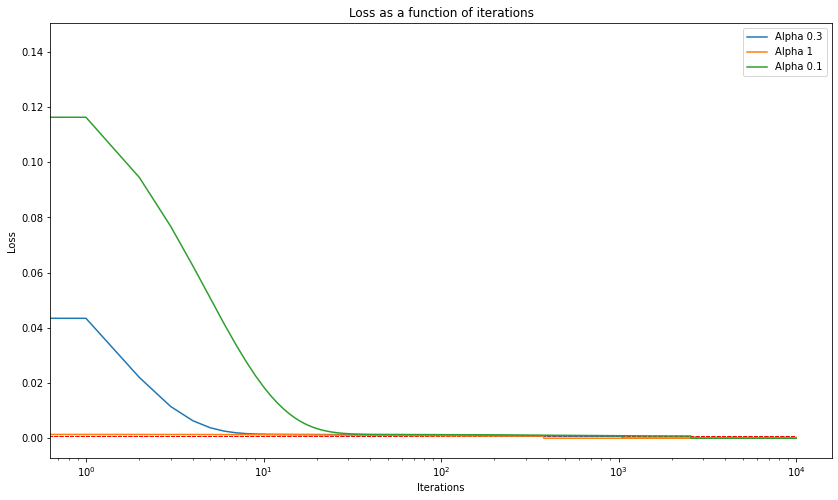

In [41]:
const_theta = np.random.random(size=2)
iterations=10000
for alpha in range(len(best_alphas)):  
    theta, J_history = efficient_gradient_descent(X_train ,y_train, const_theta, best_alphas[alpha], iterations)
    plt.plot(np.arange(iterations), J_history, label="Alpha {}".format(best_alphas[alpha]))
    plt.legend
    plt.xscale('log')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss as a function of iterations')
    plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',linewidth = 1, linestyle = 'dashed')
plt.legend()
plt.show()

This is yet another sanity check. This function plots the regression lines of your model and the model based on the pseudoinverse calculation. Both models should exhibit the same trend through the data. 

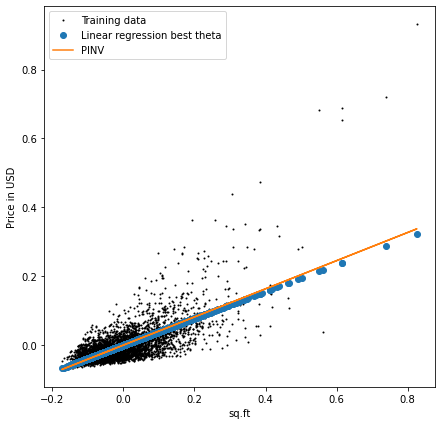

In [42]:
plt.figure(figsize=(7, 7))
plt.plot(X_train[:,1], y_train, 'ro', ms=1, mec='k')
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.plot(X_train[:, 1], np.dot(X_train, best_theta), 'o')
plt.plot(X_train[:, 1], np.dot(X_train, theta_pinv), '-')

plt.legend(['Training data', 'Linear regression best theta', 'PINV']);

## Multivariate Linear Regression

take more than one feature for multiple linear regression model. The regression equation is almost the same as the simple linear regression equation:

$$
\hat{y} = h_\theta(\vec{x}) = \theta^T \vec{x} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n
$$


In [43]:
data_path=os.getcwd()
df = pd.read_csv('{}/data.csv'.format(data_path))
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


## Preprocessing

Take multiple features but drop those who are clearly irrelevant.

In [44]:
X = df.drop(columns=['price', 'id', 'date']).values
y = df['price'].values

In [45]:
# preprocessing
X, y = preprocess(X, y)
print('X shape: ' + str(X.shape) + ', y shape: ' + str(y.shape))

Mean normalization has been applied per column
X shape: (5000, 17), y shape: (5000,)


In [46]:
# training and validation split
X_train, X_val,y_train, y_val = dataset_split(X,y,split_ratio=0.8)
print('X_train shape: ' + str(X_train.shape) + ', y_train shape: ' + str(y_train.shape))

Dataset has been splitted in ratio of 80.0%
X_train shape: (4000, 17), y_train shape: (4000,)


3D visualization (two features)

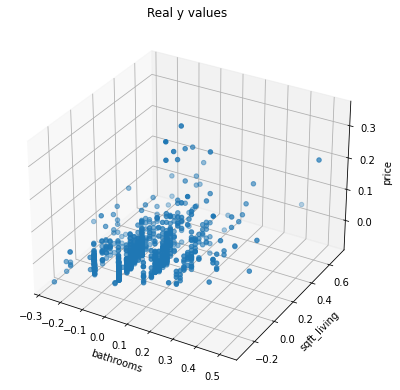

In [57]:
%matplotlib inline
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure(figsize=(5,5))
ax = p3.Axes3D(fig)
xx = X_train[:, 1][:1000]
yy = X_train[:, 2][:1000]
zz = y_train[:1000]
ax.scatter(xx, yy, zz, marker='o')
ax.set_xlabel('bathrooms')
ax.set_ylabel('sqft_living')
ax.set_zlabel('price')
plt.title('Real y values')
plt.show()

In [48]:
def add_bias(data):
    ones = np.ones(shape = data.shape[0]).reshape(-1,1)
    return np.concatenate((ones, data), 1)

X_train = add_bias(X_train)
X_val = add_bias(X_val)
print('X_train shape: ' + str(X_train.shape))

X_train shape: (4000, 18)


In [49]:
shape = X_train.shape[1]
theta = np.ones(shape)
J = compute_cost(X_train, y_train, theta)

In [50]:
np.random.seed(42)
shape = X_train.shape[1]
theta = np.random.random(shape)
iterations = 40000
theta, J_history = efficient_gradient_descent(X_train ,y_train, theta, best_alpha, iterations)

Gradient descent process is done. learning rate is: 0.3, num of iterations is: 2894


In [51]:
theta_pinv = pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

Pinv process is done


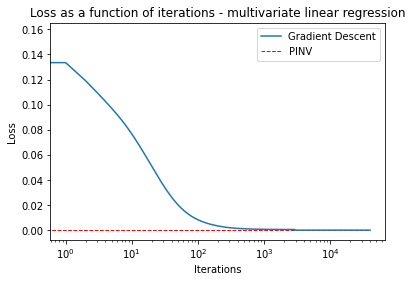

In [52]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations - multivariate linear regression')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.legend(["Gradient Descent", "PINV"], loc ="upper right")
plt.show()

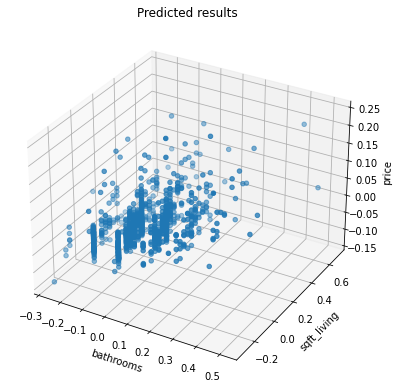

In [58]:
%matplotlib inline
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure(figsize=(5,5))
ax = p3.Axes3D(fig)
xx = X_train[:, 1][:1000]
yy = X_train[:, 2][:1000]
zz = np.dot(X_train, theta)[:1000]
ax.scatter(xx, yy, zz, marker='o')
ax.set_xlabel('bathrooms')
ax.set_ylabel('sqft_living')
ax.set_zlabel('price')
plt.title('Predicted results')
plt.show()

## Polynomial Regression

Linear Regression allows us to explore linear relationships but if we need a model that describes non-linear dependencies we can also use Polynomial Regression. In order to perform polynomial regression, we create additional features using a function of the original features and use standard linear regression on the new features. For example, consider the following single variable $(x)$ cubic regression:

$$ x_0 = 1, \space x_1 = x, \space x_2 = x^2, \space x_3 = x^3$$

And after using standard linear regression:

$$ f(x) = \theta_0 + \theta_1 x + \theta_2 x^2 +  \theta_3 x^3$$

use polynomial regression by using all **quadratic** feature combinations: 

$$ 1, x, y, z, x^2, y^2, z^2, xy, xz, yz, ...$$

evaluate the MSE cost on the training and testing datasets.

In [59]:
columns_to_drop = ['price', 'id', 'date']
all_features = df.drop(columns=columns_to_drop)
all_features.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [60]:
def create_features(data, normalization=lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x))):
    """Creates the polynomial features

    Args:
        data: the data.
        degree: A integer for the degree of the generated polynomial function.
        normalization: A function for normalization
    """
    new_data = pd.DataFrame()
    for i in range(0, data.shape[1]):
        column_1 = data.iloc[:, i]
        for j in range(i, data.shape[1]):
            column = data.iloc[:, j]
            name = column.name + "_" + column_1.name
            new_data[name] = column_1 * column
    return pd.concat([data, new_data], axis=1)


In [61]:
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
X = create_features(all_features)
y = df['price'].values
print(X.shape)

X, y = preprocess(X, y)
X = add_bias(X)
print(X.shape)

np.random.seed(42)
X_train, X_val,y_train, y_val = dataset_split(X,y,split_ratio=0.8)
print('X_train shape: ' + str(X_train.shape) + ', y_train shape: ' + str(y_train.shape))

(5000, 170)
Mean normalization has been applied per column
(5000, 171)
Dataset has been splitted in ratio of 80.0%
X_train shape: (4000, 171), y_train shape: (4000,)


In [62]:
def theta_init(X):
    """ Generate an initial value of vector θ from the original independent variables matrix
         Parameters:
          X:  independent variables matrix
        Return value: a vector of theta filled with initial guess
    """
    theta = np.random.randn(len(X[0]), 1)
    return theta

# MSE cost
def mse_cost(y, y_hat):
    """ 
    y --> true/target value.
    y_hat --> hypothesisx
    """ 
    #Calculating loss.
    loss = np.mean((y_hat - y)**2)
    return loss

def Multivariable_Linear_Regression(X,y,learningrate, iterations):
    """ Find the multivarite regression model for the data set
         Parameters:
          X: independent variables matrix
          y: dependent variables matrix
          learningrate: learningrate of Gradient Descent
          iterations: the number of iterations
        Return value: the final theta vector and the plot of cost function
    """
    y_new = np.reshape(y, (len(y), 1))   
    cost_lst = []
    vectorX = X
    theta = theta_init(X)
    #print(theta.shape)
    m = len(X)
    for i in range(iterations):
        gradients = 1/m * vectorX.T.dot(vectorX.dot(theta) - y_new)
        theta = theta - learningrate * gradients
        y_pred = vectorX.dot(theta)
        cost_value = mse_cost(y, y_pred)
        cost_lst.append(cost_value)
    return theta,cost_lst

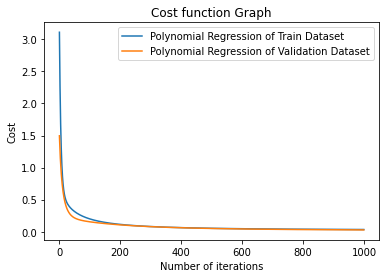

In [63]:
iterations=1000
alpha=0.1

theta_train,cost_train = Multivariable_Linear_Regression(X_train, y_train, alpha, iterations)
plt.plot(np.arange(1,iterations),cost_train[1:],label='Polynomial Regression of Train Dataset')

theta_val,cost_val = Multivariable_Linear_Regression(X_val, y_val, alpha, iterations)
plt.plot(np.arange(1,iterations),cost_val[1:],label='Polynomial Regression of Validation Dataset')
plt.legend()
plt.title('Cost function Graph')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.show()

## Adaptive Learning Rate

Changing alpha during training might improve convergence in terms of the global minimum found and running time. 

Time based decay: this method reduces the learning rate every iteration according to the following formula:

$$\alpha = \frac{\alpha_0}{1 + D \cdot t}$$

Where $\alpha_0$ is the original learning rate, $D$ is a decay factor and $t$ is the current iteration.

In [64]:
def adaptive_learning_rate(alpha,decay_factor,t):
    alpha=alpha/(1+decay_factor*t)
    return alpha

def adaptive_learning_efficient_gradient_descent(X,y,theta,alpha=0.1,num_iters=4000,decay_factor=3):
    """
    Learn the parameters of the model using gradient descent using 
    the *training set*. Gradient descent is an optimization algorithm 
    used to minimize some (loss) function by iteratively moving in 
    the direction of steepest descent as defined by the negative of 
    the gradient. We use gradient descent to update the parameters
    (weights) of our model.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    
    #J_history = [] # Use a python list to save cost in every iteration
    theta = theta.copy() # avoid changing the original thetas
    m = len(y)
    initial_alpha=alpha
    J_history = np.zeros(num_iters)
    for it in range(num_iters):
        prediction = np.dot(X,theta)
        alpha=adaptive_learning_rate(alpha,decay_factor,it)
        theta = theta -(1/m)*alpha*(X.T.dot((prediction - y)))
        J_history[it]  = compute_cost(X, y, theta)
    print('Gradient descent process with adaptive learning rate is done. Decay factor: {}, intial Alpha: {}, num of iterations is: {}'.format(decay_factor,initial_alpha,num_iters))
    return theta, J_history

In [65]:
df = pd.read_csv('data.csv')
X = df['sqft_living'].values
y = df['price'].values
print(X.shape)

X, y = preprocess(X, y)

np.random.seed(42)
X_train, X_val,y_train, y_val = dataset_split(X,y,split_ratio=0.8)
print('X_train shape: ' + str(X_train.shape) + ', y_train shape: ' + str(y_train.shape))

X_train = add_bias_1D(X_train)
X_val = add_bias_1D(X_val)
print('X_train shape: ' + str(X_train.shape) + ', X_val shape: ' + str(X_val.shape))

(5000,)
Mean normalization has been applied per column
Dataset has been splitted in ratio of 80.0%
X_train shape: (4000,), y_train shape: (4000,)
X_train shape: (4000, 2), X_val shape: (1000, 2)


Gradient descent process with adaptive learning rate is done. Decay factor: 0.1, intial Alpha: 0.3, num of iterations is: 10000
Gradient descent process with adaptive learning rate is done. Decay factor: 0.2, intial Alpha: 0.3, num of iterations is: 10000
Gradient descent process with adaptive learning rate is done. Decay factor: 0.30000000000000004, intial Alpha: 0.3, num of iterations is: 10000
Gradient descent process with adaptive learning rate is done. Decay factor: 0.4, intial Alpha: 0.3, num of iterations is: 10000
Gradient descent process with adaptive learning rate is done. Decay factor: 0.5, intial Alpha: 0.3, num of iterations is: 10000
Gradient descent process with adaptive learning rate is done. Decay factor: 0.6, intial Alpha: 0.3, num of iterations is: 10000
Gradient descent process with adaptive learning rate is done. Decay factor: 0.7000000000000001, intial Alpha: 0.3, num of iterations is: 10000
Gradient descent process with adaptive learning rate is done. Decay facto

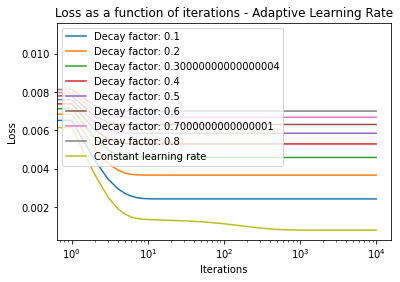

In [66]:
initial_theta = np.random.random(size=2)
iterations = 10000
alpha = 0.3
decay_factors=np.arange(0.1,0.9,0.1)
for df in range(len(decay_factors)):
    theta, J_history = adaptive_learning_efficient_gradient_descent(X_train ,y_train, initial_theta, alpha, iterations,decay_factors[df])
    plt.plot(np.arange(iterations), J_history,label="Decay factor: {}".format(decay_factors[df]))

theta, J_history = gradient_descent(X_train, y_train, initial_theta, alpha, iterations)
plt.plot(np.arange(iterations), J_history,label="Constant learning rate")

plt.legend()
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations - Adaptive Learning Rate')
plt.show()